In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [7]:
bean_data = pd.read_csv("Dry_Bean.csv")
bean_data.head(15)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,SEKER
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,SEKER
7,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,SEKER
8,30685,635.681,213.534145,183.157146,1.165852,0.514081,31044,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,SEKER
9,30834,631.934,217.227813,180.897469,1.200834,0.553642,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,SEKER


In [8]:
bean_data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [9]:
bean_data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [10]:
bean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

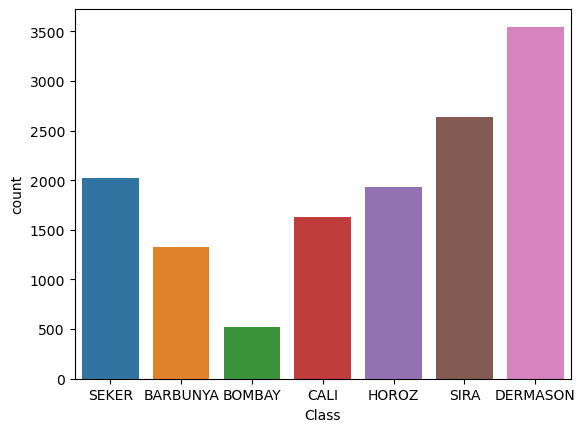

In [11]:
# Check the distribution of the target variable
sns.countplot(x="Class", data=bean_data)
plt.show()

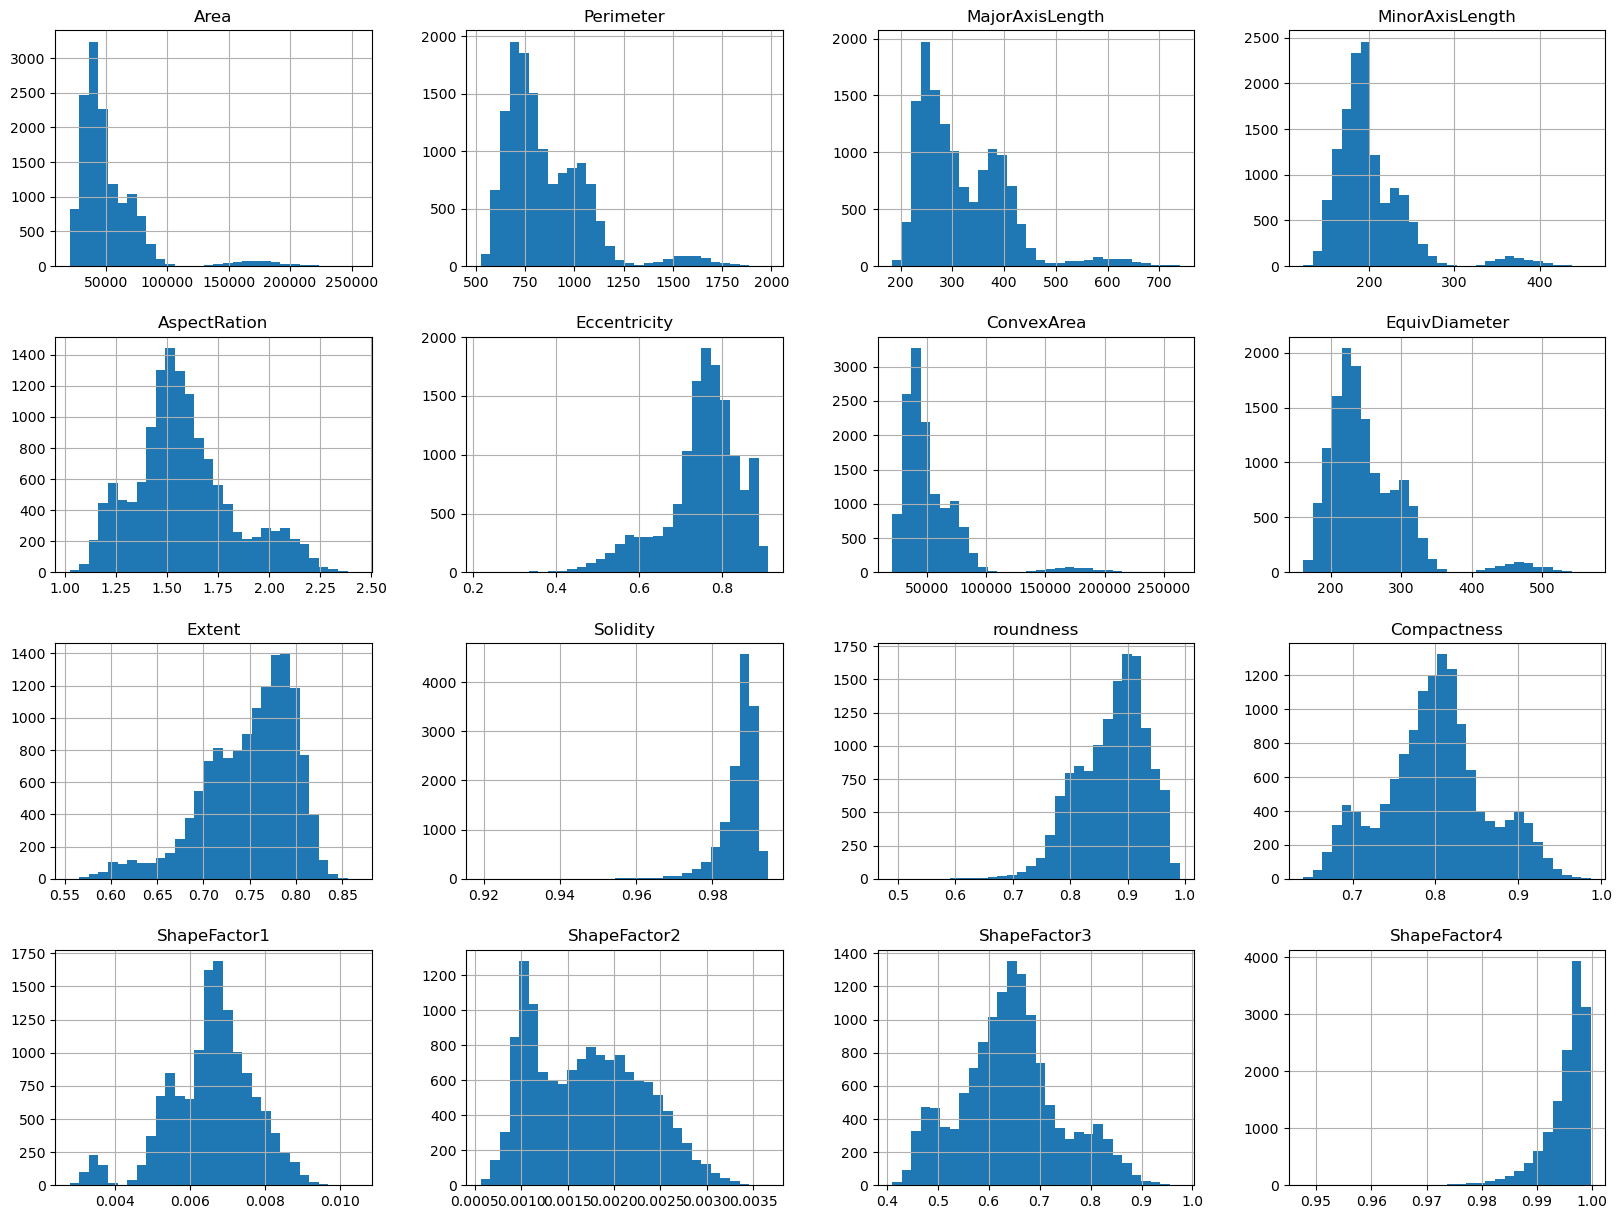

In [12]:
# Check the distribution of the features
bean_data.hist(bins=30, figsize=(20,15))
plt.show()


                     Area  Perimeter  MajorAxisLength  MinorAxisLength  \
Area             1.000000   0.966722         0.931834         0.951602   
Perimeter        0.966722   1.000000         0.977338         0.913179   
MajorAxisLength  0.931834   0.977338         1.000000         0.826052   
MinorAxisLength  0.951602   0.913179         0.826052         1.000000   
AspectRation     0.241735   0.385276         0.550335        -0.009161   
Eccentricity     0.267481   0.391066         0.541972         0.019574   
ConvexArea       0.999939   0.967689         0.932607         0.951339   
EquivDiameter    0.984968   0.991380         0.961733         0.948539   
Extent           0.054345  -0.021160        -0.078062         0.145957   
Solidity        -0.196585  -0.303970        -0.284302        -0.155831   
roundness       -0.357530  -0.547647        -0.596358        -0.210344   
Compactness     -0.268067  -0.406857        -0.568377        -0.015066   
ShapeFactor1    -0.847958  -0.864623  

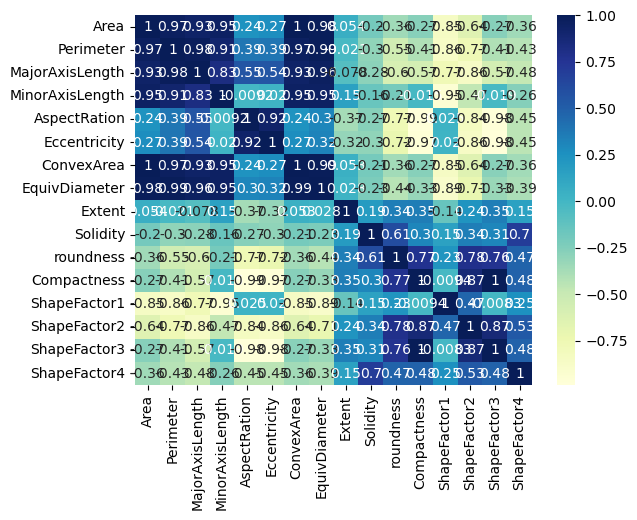

In [13]:
# Check for correlations
corr_matrix = bean_data.corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.show()

In [15]:
# Convert string labels to numerical labels
label_encoder = LabelEncoder()
bean_data['Class'] = label_encoder.fit_transform(bean_data['Class'])

In [17]:
# Split the data into features and labels
X = bean_data.iloc[:, :-1].values
y = bean_data.iloc[:, -1].values

In [18]:
# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
rf_x_pred = rf_model.predict(X_train)
rf_trainig_accuracy = accuracy_score(y_train, rf_x_pred)
rf_y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_cm = confusion_matrix(y_test, rf_y_pred)

# AdaBoost
ab_model = AdaBoostClassifier(n_estimators=100)
ab_model.fit(X_train, y_train)
ab_x_pred = ab_model.predict(X_train)
ab_trainig_accuracy = accuracy_score(y_train, ab_x_pred)
ab_y_pred = ab_model.predict(X_test)
ab_accuracy = accuracy_score(y_test, ab_y_pred)
ab_cm = confusion_matrix(y_test, ab_y_pred)

# XGBoost
xgb_model = XGBClassifier(n_estimators=100)
xgb_model.fit(X_train, y_train)
xgb_x_pred = xgb_model.predict(X_train)
xgb_training_accuracy = accuracy_score(y_train, xgb_x_pred)
xgb_y_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_cm = confusion_matrix(y_test, xgb_y_pred)

In [26]:
print("Random Forest")
print("Accuracy training: {:.2f}%".format(rf_trainig_accuracy*100))
print("Accuracy testing: {:.2f}%".format(rf_accuracy*100))
print("Confusion Matrix:\n", rf_cm)

print("\nAdaBoost")
print("Accuracy training: {:.2f}%".format(ab_trainig_accuracy*100))
print("Accuracy testing: {:.2f}%".format(ab_accuracy*100))
print("Confusion Matrix:\n", ab_cm)

print("\nXGBoost")
print("Accuracy trainig: {:.2f}%".format(xgb_training_accuracy*100))
print("Accuracy testing: {:.2f}%".format(xgb_accuracy*100))
print("Confusion Matrix:\n", xgb_cm)

Random Forest
Accuracy training: 100.00%
Accuracy testing: 92.18%
Confusion Matrix:
 [[235   0  18   0   1   1   6]
 [  0 117   0   0   0   0   0]
 [ 13   0 299   0   3   1   1]
 [  0   0   0 617   2   5  47]
 [  1   0   9   3 389   0   6]
 [  3   0   0  15   0 386   9]
 [  0   0   1  54   6   8 467]]

AdaBoost
Accuracy training: 64.86%
Accuracy testing: 63.35%
Confusion Matrix:
 [[  0   0 233   1   0   0  27]
 [117   0   0   0   0   0   0]
 [  0   0 315   0   1   0   1]
 [  0   0   0 628   0   0  43]
 [  0   0  86   5 291   0  26]
 [  0   0   1 302   0  81  29]
 [  0   0  26  81  16   3 410]]

XGBoost
Accuracy trainig: 100.00%
Accuracy testing: 92.77%
Confusion Matrix:
 [[239   0  13   0   0   2   7]
 [  0 117   0   0   0   0   0]
 [  9   0 303   0   3   1   1]
 [  0   0   0 616   1   6  48]
 [  2   0   4   3 392   0   7]
 [  5   0   0  12   0 389   7]
 [  0   0   1  53   5   7 470]]
